##### Setting custom home path

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

### Installing YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### Preparing custom dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

# Replace with your dataset
from roboflow import Roboflow
rf = Roboflow(api_key="***********")
project = rf.workspace("study-ulk5k").project("chicken-weight-approx-5rsan")
version = project.version(1)
dataset = version.download("yolov8")

### Custom training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


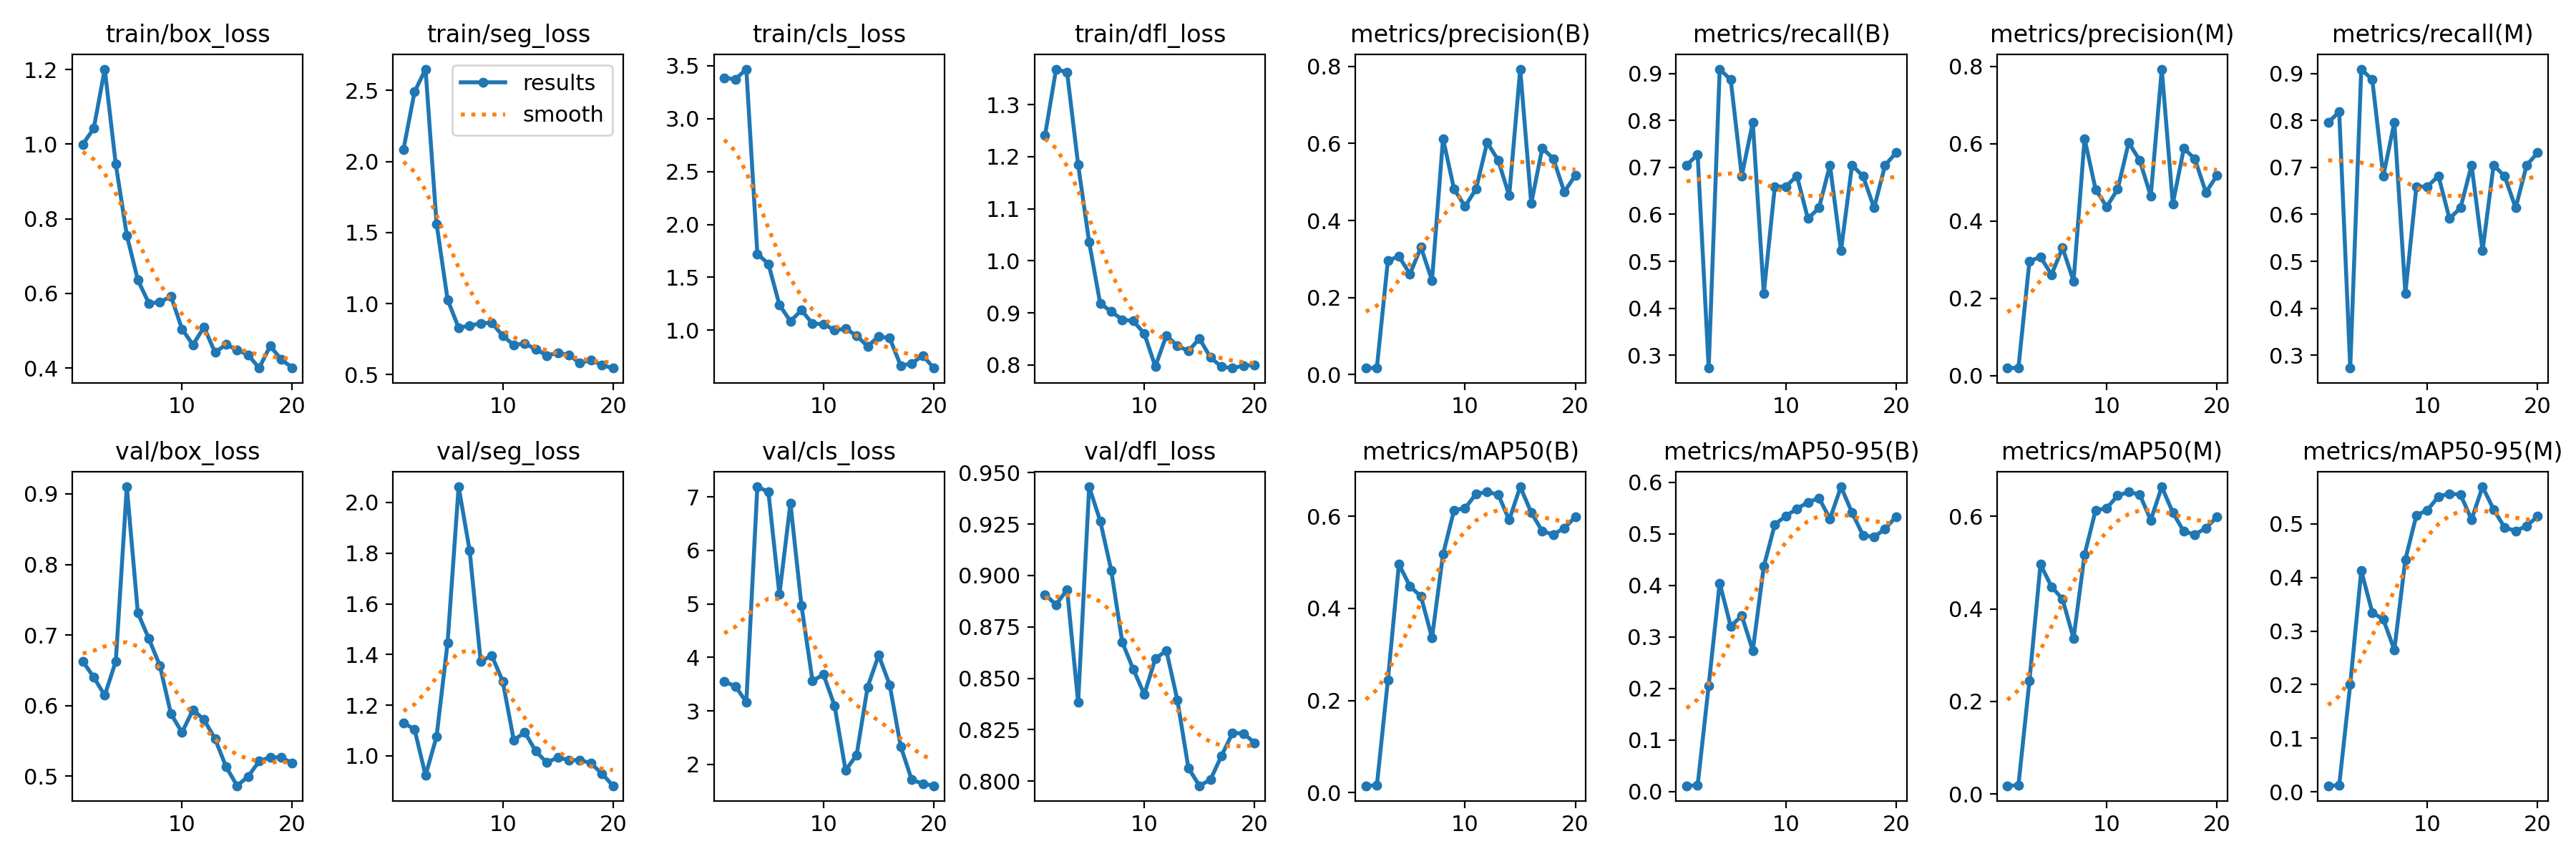

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1000)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

### Validate custom model

In [ ]:
!yolo task=segment mode=val model=/content/drive/MyDrive/Chicken_detection/Model/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/chicken-weight-approx-1/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.36s/it]
                   all          6         44      0.414      0.773      0.637      0.567      0.414      0.773      0.637      0.541
Speed: 0.2ms preprocess, 54.0ms inference, 0.0ms loss, 138.4ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ult